## BMX Ring Buffer Load Demo

You need the bmxdata module which you get by downloading

https://github.com/bmxdemo/bmxdaq/

and running `python setup.py install` or `pip install bmxdaq/`

In [10]:
%load_ext autoreload
%autoreload 2
import bmxdata
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
bmxdata.__file__


'/gpfs02/astro/packages/bacon/latest/lib/python3.8/site-packages/bmxdata.py'

In [5]:
# Load data
d = bmxdata.BMXRingbuffer('/astro/u/anze/bmxdata/raw/2011/ring/201107_225100_D1.ring')

Loading version: 1
Ncards: 2 Size: 2147483648


In [6]:
# the four channels are stored in d.datad0c1, d.datad0c2, d.datad1c1, d.daatad1c2
# where d1c1 means channel one on digitizer 1
# Yes, we use C counting for digitizer cards and Fortran counting for channels
print (d.datad0c1.shape, d.datad0c1.dtype)

(2147483648,) int8


Text(0, 0.5, 'ADC units')

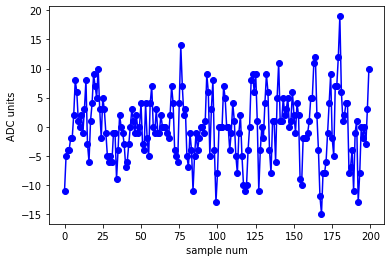

In [7]:
# plot some real data
plt.plot(d.datad0c1[:200],'bo-')
plt.xlabel("sample num")
plt.ylabel("ADC units")

In [8]:
# get power spectrum on the channel 0,1 and cross, just first 3 chunks for speed
freq,ps = d.getPS(combs=[(0,0),(1,1),(0,1)], Nchunks = 3)

AttributeError: 'BMXRingbuffer' object has no attribute 'getPS'

In [ ]:
plt.plot(freq,ps[0],label = 'CHAN = 0')
plt.plot(freq,ps[1],label = 'CHAN = 1')
plt.plot(freq,np.real(ps[2]),label = 'CHAN = 1x2 real')
plt.semilogy()
plt.ylim(1e8,1e11)
plt.xlabel('freq')
plt.ylabel('power')

In [ ]:
# and channel 2 around galactic cut
freq,ps = d.getPS(combs=[(0,0)], fmin=1419.0, fmax=1422, Navg=512, verbose = 0)
plt.plot(freq,ps[0],label = 'CHAN = 0')
plt.xlabel('freq')
plt.ylabel('power')

In [15]:
# now, let's pick some frequencies.
T=d.datad0c1.shape[0]/1.1e9
DeltaF = 1/T
try:
    del d.datad0c2
    del d.datad1c1
    del d.datad1c2
except:
     pass
data= d.datad0c1.astype('float')
try:
    del d.datad0c1
except:
    pass